# Introduction to Neural Networks

In this notebook, the performance of simple neural network architectures featuring different choices of hyperparameters is demonstrated. This showcases the influence of these hyperparameters on the performance of the neural networks, helping to build intuition. Additionally, a demonstration of constructing such neural networks in PyTorch is provided.

In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
import torchvision
from Models import FCNN, CNN
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

### The Data: MNIST

The neural network models will be trained on the MNIST dataset, which consists of handwritten digits ranging from 0 to 9. The goal of the neural networks is to correctly classify these digits into their respective classes (0-9). Below is a random demonstration of a sample from the dataset:

Text(0.5, 0.98, 'Samples of Digits')

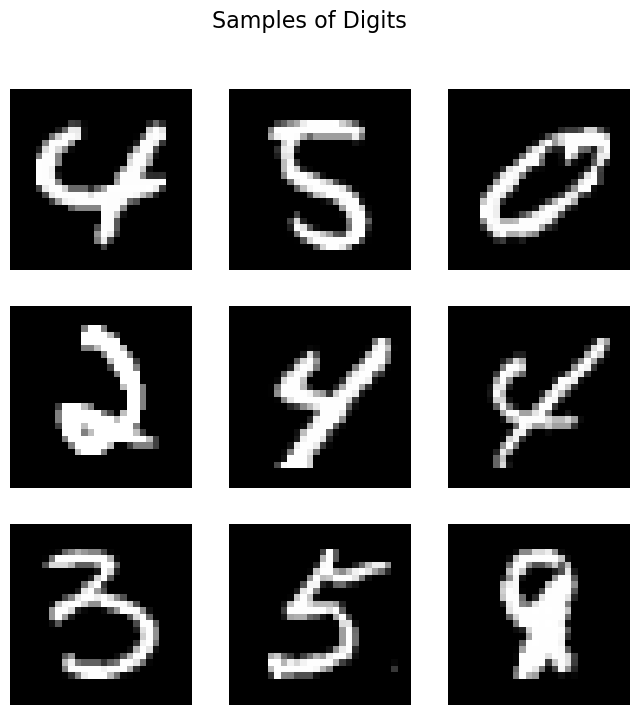

In [2]:
# Load the train and the test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform=transforms.ToTensor())

# Create a figure of samples of the traindataset
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# Loop over each subplot and plot some data
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        random_number = np.random.randint(0, 60000)
        ax.imshow(train_dataset[random_number][0].permute(1,2,0), cmap='gray')
        ax.axis('off')
        
fig.suptitle('Samples of Digits', fontsize=16)

### The Fully Connected Neural Networks

In this section, the performance of several fully connected neural networks trained on the MNIST dataset is evaluated. Each data sample in the MNIST dataset is a 28x28 black and white image of a handwritten digit, represented as a 28x28 dimensional tensor. This tensor is then transformed into a 784-dimensional vector (since 28*28=784), which serves as the input to the fully connected neural network.

In [3]:
# Define the models and load their parameters
# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# The first FCNN model
hidden_layers_FCNN_1 = [100,100]
FCNN_1 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_1.to(device)

# The second FCNN model
hidden_layers_FCNN_2 = [100, 100, 100]
FCNN_2 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_2.to(device)

# The third FCNN model
hidden_layers_FCNN_3 = [150, 150]
FCNN_3 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_3.to(device)

# The fourth FCNN model
hidden_layers_FCNN_4 = [150, 150, 150]
FCNN_4 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_4.to(device)

# Combine all the FCNN models in a list
FCNN_Models = [FCNN_1, FCNN_2, FCNN_3, FCNN_4]

# Load the parameters for all the models with learning rate 0.01
for model in FCNN_Models:
    model_path = f"./FCNN_Model_Parameters/{str(model).split('(')[0]}_{FCNN_Models.index(model)}_lr_0.01"       # A directory for the model parameters    
    model.load_state_dict(torch.load(model_path))

#### The Losses of the Fully Connected Neural Networks

The following plots display the loss curves of several fully connected neural networks trained on the standard MNIST dataset. The subplot titles specify the model architectures as a list, with each entry representing the number of nodes in the hidden layers.

In [4]:
# Define a list to collect all the losses of the pretrained FCNN models 
models_losses = []

# Specify the directory of the saved model losses
loss_list_dir = os.listdir("./FCNN_Model_Loss")

# Load all the model losses in the list
for i in range(len(loss_list_dir)):
    current_dir = "./FCNN_Model_Loss/" + loss_list_dir[i]
    current_model_loss = []
    if i % 5 == 0:
        if i > 0:
            models_losses.append(current_model_loss_list)
        current_model_loss_list = []
    with open(current_dir, "r") as f:
        for line in f:
            current_model_loss.append(float(line))
    current_model_loss_list.append(current_model_loss)    
models_losses.append(current_model_loss_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

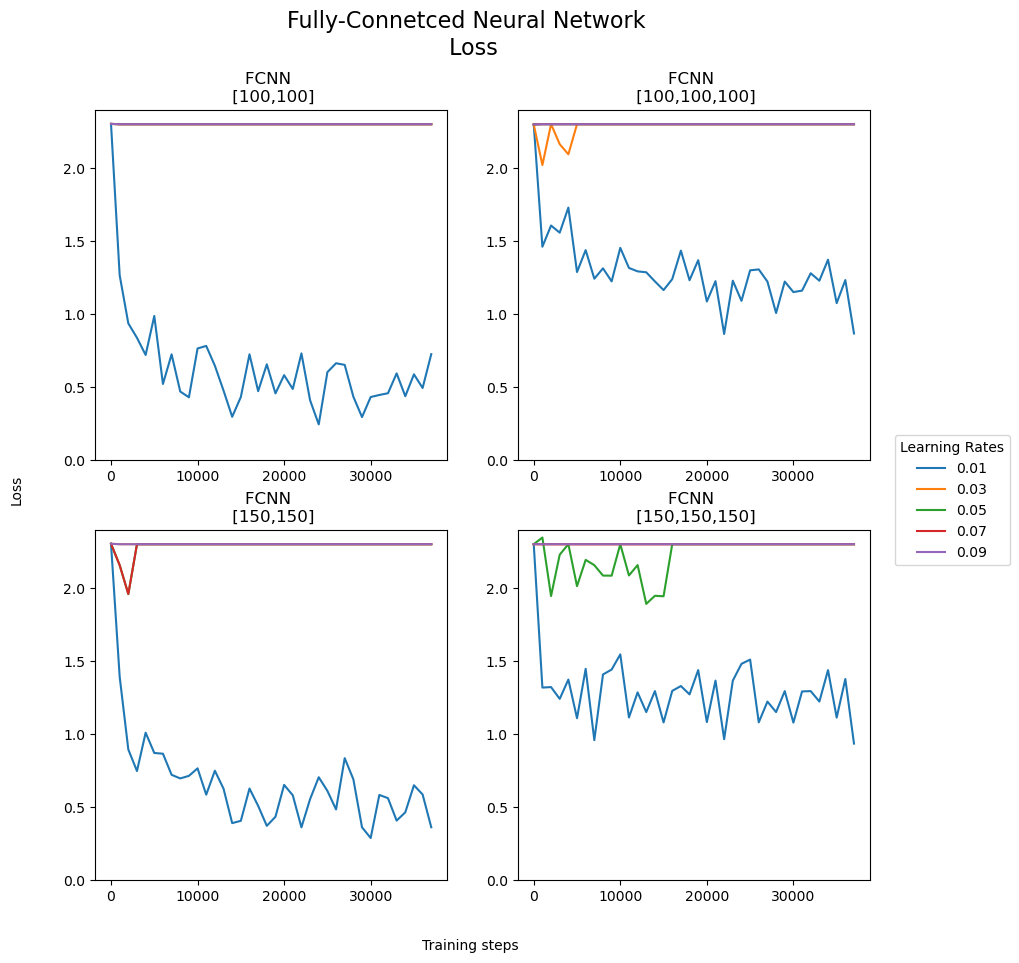

In [5]:
# Create a figure with 4 subplots displaying the training loss curves
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Fully-Connetced Neural Network \n Loss", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["FCNN \n [100,100]", "FCNN \n [100,100,100]", "FCNN \n [150,150]", "FCNN \n [150,150,150]"]

# Set shared x-axis label
fig.text(0.5, 0.04, "Training steps", ha='center')

# Set shared y-axis label
fig.text(0.04, 0.5, "Loss", va='center', rotation='vertical')

for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    ax.set_ylim(0, 2.4)
    # Add the loss curves of the models
    for j in range(len(models_losses[i])):
        ax.plot([k for k in range(0,len(models_losses[i][j])) if k % 1000 == 0], [models_losses[i][j][k] for k in range(len(models_losses[i][j])) if k % 1000 == 0],  label=learning_rates[j])

# Add a legend
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.29))

It is noteworthy that only the model architectures trained with a learning rate of 0.01 exhibit a decreasing loss curve, indicating successful training progress. Conversely, for all other learning rates, it appears that the model parameters become trapped in a local minimum from which they cannot escape.

#### The Accuracy of the Fully Connected Neural Networks

The subsequent plots illustrate the accuracy of predictions made by the fully connected neural networks on the MNIST test dataset. This dataset comprises images that were not utilized during the training phase.

In [6]:
# Define a list to collect all the test accuarcies of the pretrained FCNN models 
models_accuracies = []

# Specify the directory of the saved accuracies
accuracy_list_dir = os.listdir("./FCNN_Model_Accuracy")

# Load all the model accuracies in the list
for i in range(len(accuracy_list_dir)):
    current_dir = "./FCNN_Model_Accuracy/" + accuracy_list_dir[i]
    current_model_accuracy = []
    if i % 5 == 0:
        if i > 0:
            models_accuracies.append(current_model_accuracy_list)
        current_model_accuracy_list = []
    with open(current_dir, "r") as f:
        for line in f:
            current_model_accuracy.append(float(line))
    current_model_accuracy_list.append(current_model_accuracy)    
models_accuracies.append(current_model_accuracy_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

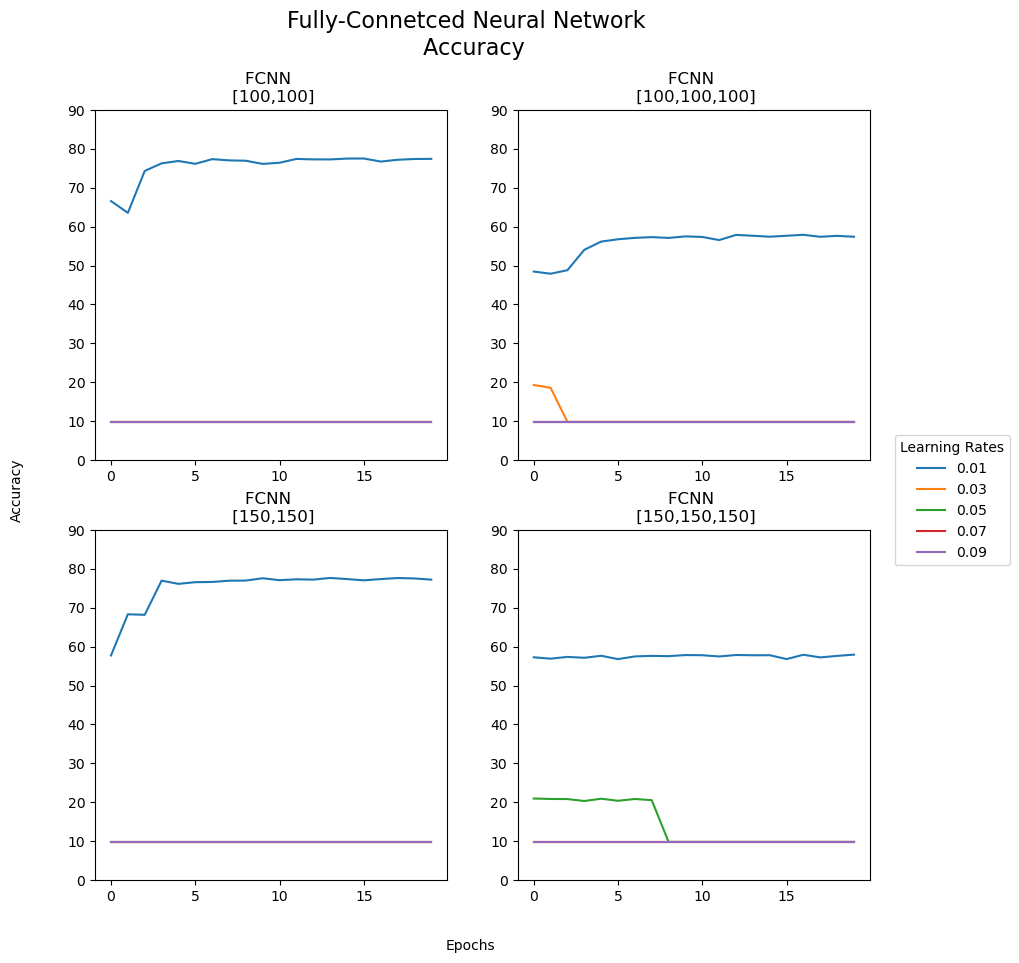

In [7]:
# Create a figure with 4 subplots displaying the test accuracy
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Fully-Connetced Neural Network \n Accuracy", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["FCNN \n [100,100]", "FCNN \n [100,100,100]", "FCNN \n [150,150]", "FCNN \n [150,150,150]"]

# Set shared x-axis label
fig.text(0.5, 0.04, "Epochs", ha='center')

# Set shared y-axis label
fig.text(0.04, 0.5, "Accuracy", va='center', rotation='vertical')

for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    ax.set_ylim(0, 90)
    # Add the accuracy curves of the models
    for j in range(len(models_accuracies[i])):
        ax.plot([k for k in range(0,len(models_accuracies[i][j]))], models_accuracies[i][j],  label=learning_rates[j])

# Add a legend
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.29))

Once again, a consistent pattern emerges, mirroring the trends observed in the loss curves. Specifically, it's evident that only the models trained with a learning rate of 0.01 demonstrate consistent performance improvements throughout training. Conversely, models trained with other learning rates appear to regress, converging toward local minima.

#### Demo of the Fully Connected Neural Network Models

In this subsection, a demonstration of the neural networks' actions on an example input image is provided.  Although no recognizable patterns emerge from this demo, it serves as a comparison to the demo of convolutional neural networks in the following section. The subsequent images illustrate the transformation of input pixels through various stages: after passing through the first linear layer matrix, following the ReLU activation function, and finally, after the action of the second linear layer matrix.

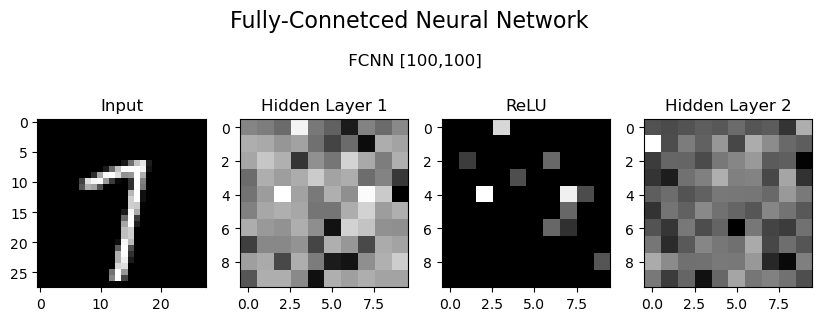

In [8]:
# Plot the actions of a FCNN model
fig, axs = plt.subplots(1,4,figsize=(10,4))

# Add the general title
fig.suptitle("Fully-Connetced Neural Network ", fontsize=16)

# Add the subtitle
fig.text(0.5, 0.84, " FCNN [100,100]", ha='center', fontsize=12)

# Create the subplots for the different steps
for i in range(4):
# Choose the subplot
    if i == 0:
        # Define the example image
        image = train_dataset[42][0].reshape(-1,28*28).to(device)
        axs[i].set_title("Input")
    elif (i % 2 != 0):
        image = FCNN_1.linear_layers[i//2](image.reshape(-1,int(np.sqrt(image.shape[1]))*int(np.sqrt(image.shape[1]))))
        axs[i].set_title(f"Hidden Layer {(i//2)+1}")
    elif (i > 0) and (i % 2 == 0):
        image = FCNN_1.rl(image)
        axs[i].set_title(f"ReLU")
    axs[i].imshow(image.reshape(-1, int(np.sqrt(image.shape[1])), int(np.sqrt(image.shape[1]))).permute(1,2,0).cpu().detach().numpy(), cmap="gray")



### The Convolutional Neural Networks

This section delves into the performance evaluation of convolutional neural network models trained on identical datasets, utilizing consistent hyperparameters throughout the training process, as done previously.

In [9]:
# Define the CNN models and load their parameters

# The first CNN model
layers_CNN_1 = [[1,32,3],[32,1,3],144]
CNN_1 = CNN(layers_CNN_1, 10)
CNN_1.to(device)

# The second CNN model
layers_CNN_2 = [[1,32,3],[32,32,3],[32,1,3],121]
CNN_2 = CNN(layers_CNN_2, 10)
CNN_2.to(device)

# The third CNN model
layers_CNN_3 = [[1,64,3],[64,1,3],144]
CNN_3 = CNN(layers_CNN_3, 10)
CNN_3.to(device)

# The fourth CNN model
layers_CNN_4 = [[1,64,3],[64,64,3],[64,1,3],121]
CNN_4 = CNN(layers_CNN_4, 10)
CNN_4.to(device)

# Combine all the FCNN models in a list
CNN_Models = [CNN_1, CNN_2, CNN_3, CNN_4]


# Load the parameters for all the models with learning rate 0.01
for model in CNN_Models:
    cnn_model_path = f"./CNN_Model_Parameters/{str(model).split('(')[0]}_{CNN_Models.index(model)}_lr_0.01"       # A directory for the model parameters    
    model.load_state_dict(torch.load(cnn_model_path))

#### The Losses of the Convolutional Neural Networks

In the following plots, the loss curves of the convolutional neural networks on the MNIST dataset, using the same learning rates as before, are displayed.

In [10]:
# Define a list to collect all the losses of the pretrained CNN models 
cnn_models_losses = []

# Specify the directory of the saved model losses
cnn_loss_list_dir = os.listdir("./CNN_Model_Loss")

# Load all the model losses in the list
for i in range(len(cnn_loss_list_dir)):
    cnn_current_dir = "./CNN_Model_Loss/" + cnn_loss_list_dir[i]
    cnn_current_model_loss = []
    if i % 5 == 0:
        if i > 0:
            cnn_models_losses.append(cnn_current_model_loss_list)
        cnn_current_model_loss_list = []
    with open(cnn_current_dir, "r") as f:
        for line in f:
            cnn_current_model_loss.append(float(line))
    cnn_current_model_loss_list.append(cnn_current_model_loss)    
cnn_models_losses.append(cnn_current_model_loss_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

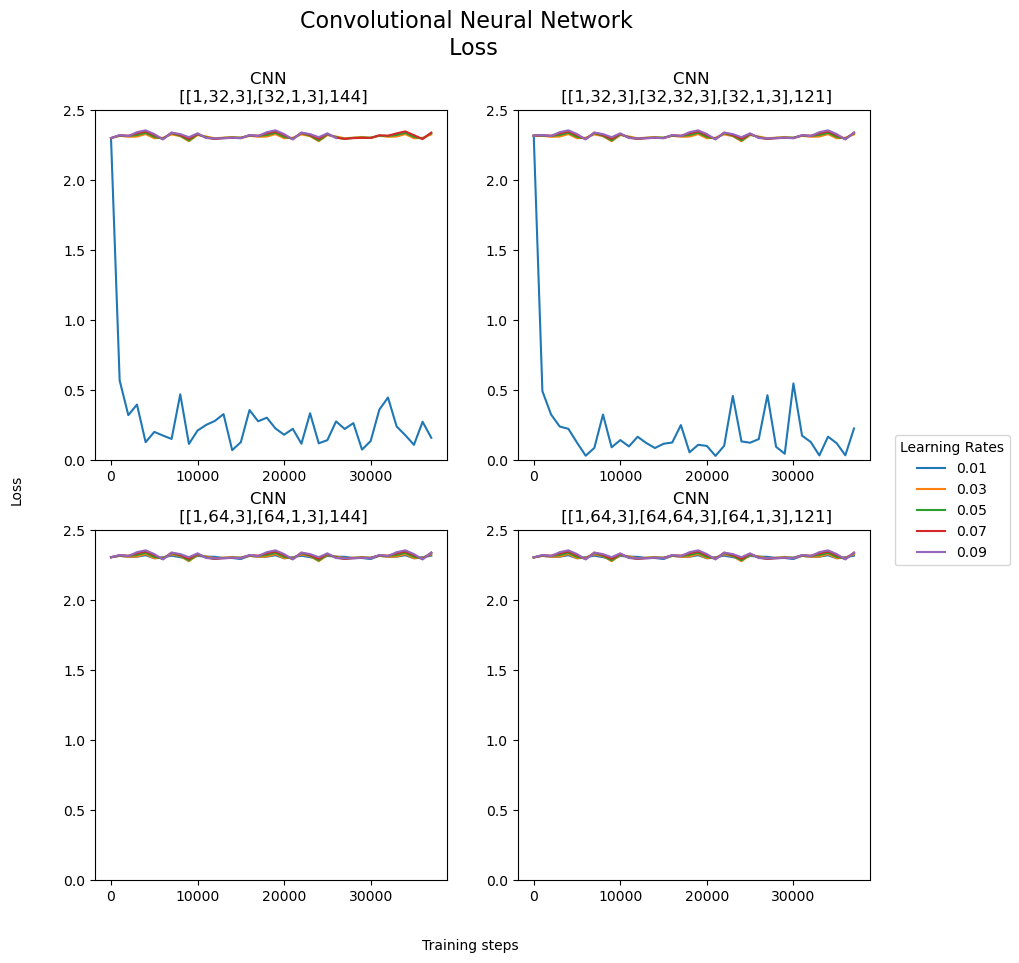

In [11]:
# Create a figure with 4 subplots displaying the training loss curves
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Convolutional Neural Network \n Loss", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["CNN \n [[1,32,3],[32,1,3],144]", "CNN \n [[1,32,3],[32,32,3],[32,1,3],121]", "CNN \n [[1,64,3],[64,1,3],144]", "CNN \n [[1,64,3],[64,64,3],[64,1,3],121]"]

# Set shared x-axis label
fig.text(0.5, 0.04, "Training steps", ha='center')

# Set shared y-axis label
fig.text(0.04, 0.5, "Loss", va='center', rotation='vertical')

# Plot the loss curves for the different models
for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    ax.set_ylim(0, 2.5)
    # Add the loss curves of the models
    for j in range(len(cnn_models_losses[i])):
        ax.plot([k for k in range(0,len(cnn_models_losses[i][j])) if k % 1000 == 0], [cnn_models_losses[i][j][k] for k in range(len(cnn_models_losses[i][j])) if k % 1000 == 0],  label=learning_rates[j])

# Add a legend
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.29))

Here, the description of the model architecture is structured as follows: each entry in the list represents a layer, with the format [input_channels, output_channels, kernel_size]. The final entry denotes the number of nodes in the last linear hidden layer. It's noteworthy that for the first two models, a learning rate of 0.01 yields the best results.

#### The Accuracy of the Convolutional Neural Networks

The subsequent plots depict the accuracy of predictions made by the convolutional neural networks on the MNIST test dataset. This dataset consists of images that were not employed in the training phase.

In [12]:
# Define a list to collect all the test accuarcies of the pretrained CNN models 
cnn_models_accuracies = []

# Specify the directory of the saved accuracies
cnn_accuracy_list_dir = os.listdir("./CNN_Model_Accuracy")

# Load all the model accuracies in the list
for i in range(len(cnn_accuracy_list_dir)):
    cnn_current_dir = "./CNN_Model_Accuracy/" + cnn_accuracy_list_dir[i]
    cnn_current_model_accuracy = []
    if i % 5 == 0:
        if i > 0:
            cnn_models_accuracies.append(cnn_current_model_accuracy_list)
        cnn_current_model_accuracy_list = []
    with open(cnn_current_dir, "r") as f:
        for line in f:
            cnn_current_model_accuracy.append(float(line))
    cnn_current_model_accuracy_list.append(cnn_current_model_accuracy)    
cnn_models_accuracies.append(cnn_current_model_accuracy_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

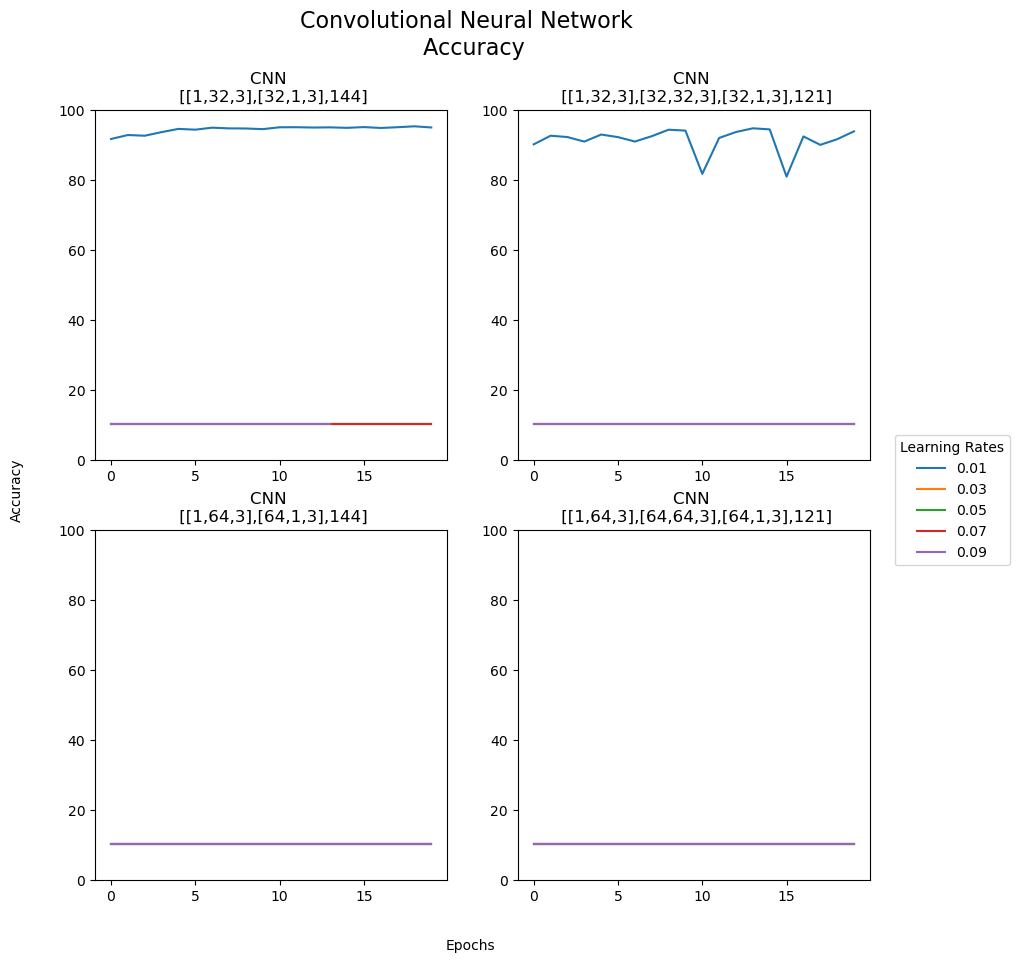

In [13]:
# Create a figure with 4 subplots displaying the test accuracy of the convolutional models
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Convolutional Neural Network \n Accuracy", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["CNN \n [[1,32,3],[32,1,3],144]", "CNN \n [[1,32,3],[32,32,3],[32,1,3],121]", "CNN \n [[1,64,3],[64,1,3],144]", "CNN \n [[1,64,3],[64,64,3],[64,1,3],121]"]

# Set shared x-axis label
fig.text(0.5, 0.04, "Epochs", ha='center')

# Set shared y-axis label
fig.text(0.04, 0.5, "Accuracy", va='center', rotation='vertical')

for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    ax.set_ylim(0, 100)
    # Add the accuracy curves of the models
    for j in range(len(cnn_models_accuracies[i])):
        ax.plot([k for k in range(0,len(cnn_models_accuracies[i][j]))], cnn_models_accuracies[i][j],  label=learning_rates[j])

# Add a legend
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.29))

The initial impressions are reaffirmed. Only the models CNN_1 and CNN_2, trained with a learning rate of 0.01, exhibit performance improvements during training. Furthermore, their classification performance on the test dataset surpasses that of the fully connected neural networks.

#### Demo of the Fully Connected Neural Network Models

In this section, the operations of various layers within a convolutional neural network model are detailed, allowing for comparison with the fully connected neural network discussed earlier. The selected model for this demonstration is the first CNN, given its superior performance on the test dataset.

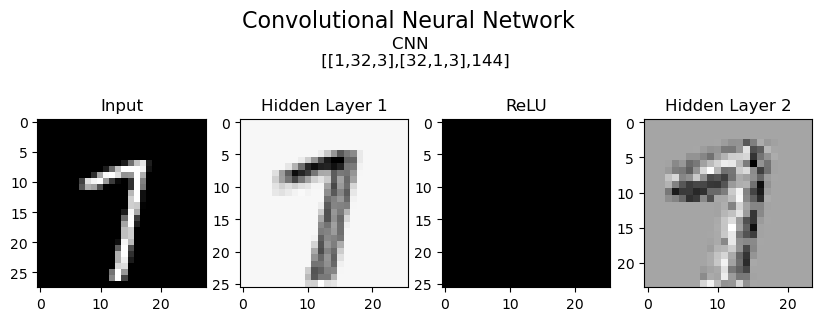

In [22]:
# Plot the actions of a CNN model
fig, axs = plt.subplots(1,4,figsize=(10,4))

# Add the general title
fig.suptitle("Convolutional Neural Network ", fontsize=16)

# Add the subtitle
fig.text(0.5, 0.84, "CNN \n [[1,32,3],[32,1,3],144]", ha='center', fontsize=12)

# Create the subplots for the different steps
for i in range(4):
# Choose the subplot
    if i == 0:
        # Define the example image
        image = train_dataset[42][0].to(device)
        axs[i].set_title("Input")
    elif (i % 2 != 0):
        image = CNN_1.linear_layers[i//2](image)
        axs[i].set_title(f"Hidden Layer {(i//2)+1}")
    elif (i > 0) and (i % 2 == 0):
        image = CNN_1.rl(image)
        axs[i].set_title(f"ReLU")
    axs[i].imshow(image[0].unsqueeze(0).permute(1,2,0).cpu().detach().numpy(), cmap="gray")


In tIn this demonstration, one can readily observe that the structure of the image is somewhat preserved. Even after two layers, the contour of the digit remains recognizable. However, in the ReLU function, the image tends to vanish as the initial layer maps everything to negative numbers.

### Comparing the Fully Connected Neural Network and the Convolutional Neural Network

In this section, the top-performing models from various architecture types will be compared. It's worth noting that the most favorable outcomes were achieved through training with a learning rate of 0.01.

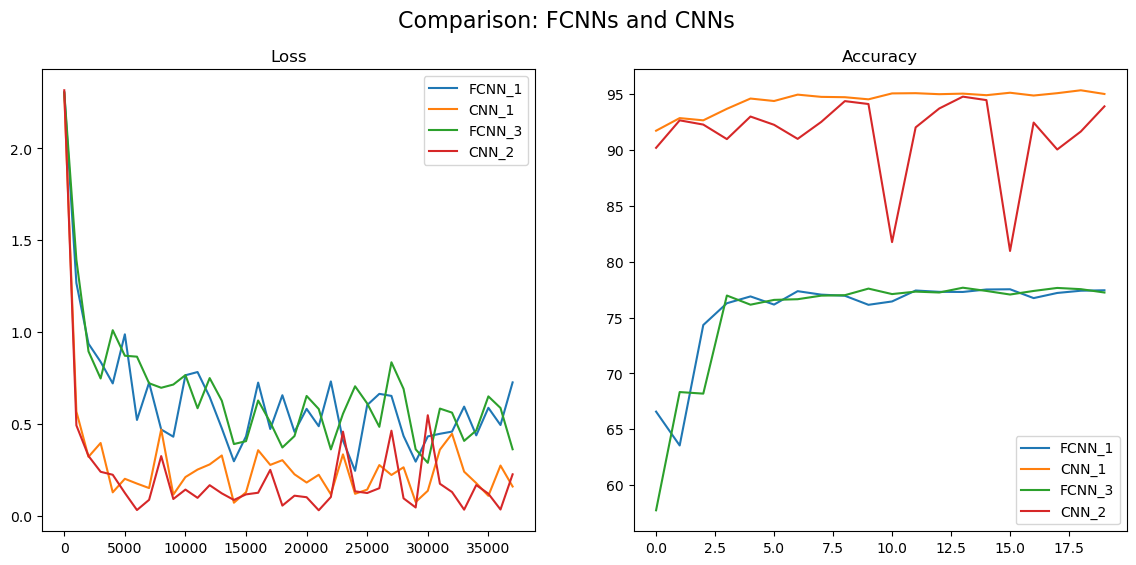

In [36]:
# Create a figure with 2 subplots displaying the difference in loss and accuracy
fig, axs = plt.subplots(1,2,figsize=(14,6))

# Add the general title
fig.suptitle("Comparison: FCNNs and CNNs", fontsize=16)


# Titles for each subplot with the list representing the number of nodes in each hidden layer
labels = ["FCNN_1", "FCNN_3","CNN_1", "CNN_2"]

# Figure 1 for the loss curves
axs[0].set_title("Loss")
# Plot the loss curves for the different models
for i in range(2):
    # Plot the FCNN models, where the first and third is choosen
    if i < 1:
        axs[0].plot([k for k in range(0,len(models_losses[i][0])) if k % 1000 == 0], [models_losses[i][0][k] for k in range(len(models_losses[i][0])) if k % 1000 == 0],  label=labels[i])
    else:
        axs[0].plot([k for k in range(0,len(models_losses[i+1][0])) if k % 1000 == 0], [models_losses[i+1][0][k] for k in range(len(models_losses[i][0])) if k % 1000 == 0],  label=labels[i])
    # Plot the CNN models, where the first and second is choosen
    axs[0].plot([k for k in range(0,len(cnn_models_losses[i][0])) if k % 1000 == 0], [cnn_models_losses[i][0][k] for k in range(len(cnn_models_losses[i][0])) if k % 1000 == 0],  label=labels[i+2])
axs[0].legend()   

# Figure 1 for the accuracy curves
axs[1].set_title("Accuracy")
# Plot the accuracy curves for the different models
for i in range(2):
    # Plot the FCNN models, where the first and third is choosen
    if i < 1:
        axs[1].plot([k for k in range(0,len(models_accuracies[i][0])) ], models_accuracies[i][0],  label=labels[i])
    else:
        axs[1].plot([k for k in range(0,len(models_accuracies[i+1][0])) ], models_accuracies[i+1][0],  label=labels[i])
    # Plot the CNN models, where the first and second is choosen
    axs[1].plot([k for k in range(0,len(cnn_models_accuracies[i][0]))], cnn_models_accuracies[i][0],  label=labels[i+2])
axs[1].legend()   
    


In conclusion, two significant insights emerge: Firstly, the choice of learning rate significantly influences the training process, affecting both the rate and the extent of model improvement. Secondly, Convolutional Neural Network architectures outperform others on the MNIST dataset, showcasing their efficacy particularly on image data. Additionally, it's notable that CNN models achieve superior performance with fewer parameters.